# Detection with CNNClassifier: Convert to Grayscale


In [1]:
from dotenv import load_dotenv

load_dotenv()

import sys
import os

sys.path.append(os.getenv('SRC_DIR'))

from utils.system import display_system_info

display_system_info(markdown=True)


**Last Updated**: 2025-04-28 21:38:55

**Python Version**: 3.11.8  
**OS**: Windows 10.0.26100  
**Architecture**: 64bit  
**Hostname**: Gan  
**Processor**: Intel64 Family 6 Model 186 Stepping 3, GenuineIntel  
**RAM Size**: 15.65 GB  
  
        

In [2]:
from torchvision import transforms
import torch
import cv2
from PIL import Image
import numpy as np

from classify import TorchClassifier

In [3]:
model_config = {
    'num_classes': 3,
    'num_blocks': 4,
    'first_out_channel': 32,
    'out_channel_multiplier': 2,
    'kernel_size': 3,
    'stride': 1,
    'padding': 1,
    'input_shape': (1, 128, 128)
}

model = TorchClassifier(model='CNNClassifier', config=model_config, device='auto', verbose=True)

New model created: CNNClassifier(
  (features): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (1): ConvBlock(
      (block): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
    )
    (2): ConvBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [4]:
aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1))
])

enhance_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [5]:
results = model.train(
    data_path=os.getenv('ROI_DATA_DIR'),
    imbalance=True,
    fraction=1,
    val_test_ratio=0.5,
    input_size=128,
    optimizer='Adam',
    lr=1e-4,
    aug_transform=aug_transform,
    enhance_transform=enhance_transform,
    val_transform=val_transform,
    batch_size=32,
    epochs=5
) 

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        1/5      0.361      85.93     0.8593     0.8598     0.8595     0.8593     0.8598     0.8595: 100%|██████████| 552/552 [05:39<00:00,  1.62it/s]


                  Loss


                 0.139: 100%|██████████| 37/37 [00:08<00:00,  4.60it/s]


              precision    recall  f1-score   support

    drowning     0.8906    0.9396    0.9144       182
    swimming     0.9659    0.9841    0.9749       690
  treadwater     0.9542    0.8772    0.9141       285

    accuracy                         0.9507      1157
   macro avg     0.9369    0.9336    0.9345      1157
weighted avg     0.9512    0.9507    0.9504      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        2/5     0.2345      91.32     0.9136     0.9137     0.9136     0.9136     0.9137     0.9136: 100%|██████████| 552/552 [11:13<00:00,  1.22s/it]


                  Loss


                0.1105: 100%|██████████| 37/37 [00:07<00:00,  4.67it/s]


              precision    recall  f1-score   support

    drowning     0.8995    0.9341    0.9164       182
    swimming     0.9868    0.9725    0.9796       690
  treadwater     0.9271    0.9368    0.9319       285

    accuracy                         0.9576      1157
   macro avg     0.9378    0.9478    0.9426      1157
weighted avg     0.9583    0.9576    0.9579      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        3/5     0.1731      93.83     0.9388     0.9388     0.9388     0.9388     0.9388     0.9388: 100%|██████████| 552/552 [06:01<00:00,  1.53it/s]


                  Loss


               0.08672: 100%|██████████| 37/37 [00:08<00:00,  4.50it/s]


              precision    recall  f1-score   support

    drowning     0.9451    0.9451    0.9451       182
    swimming     0.9841    0.9855    0.9848       690
  treadwater     0.9507    0.9474    0.9490       285

    accuracy                         0.9697      1157
   macro avg     0.9599    0.9593    0.9596      1157
weighted avg     0.9697    0.9697    0.9697      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        4/5     0.1597      94.34      0.944      0.944      0.944      0.944      0.944      0.944: 100%|██████████| 552/552 [05:55<00:00,  1.55it/s]


                  Loss


               0.09286: 100%|██████████| 37/37 [00:08<00:00,  4.40it/s]


              precision    recall  f1-score   support

    drowning     0.9072    0.9670    0.9362       182
    swimming     0.9869    0.9826    0.9847       690
  treadwater     0.9565    0.9263    0.9412       285

    accuracy                         0.9663      1157
   macro avg     0.9502    0.9587    0.9540      1157
weighted avg     0.9669    0.9663    0.9664      1157

      Epoch       Loss   Accuracy    Macro(P          R        F1) Weighted(P          R        F1)


        5/5     0.1546      94.54      0.946      0.946      0.946      0.946      0.946      0.946: 100%|██████████| 552/552 [05:56<00:00,  1.55it/s]


                  Loss


                  0.08: 100%|██████████| 37/37 [00:08<00:00,  4.45it/s]

              precision    recall  f1-score   support

    drowning     0.9508    0.9560    0.9534       182
    swimming     0.9913    0.9855    0.9884       690
  treadwater     0.9444    0.9544    0.9494       285

    accuracy                         0.9732      1157
   macro avg     0.9622    0.9653    0.9637      1157
weighted avg     0.9734    0.9732    0.9733      1157



In [6]:
results

([{'loss': 0.36371704416376527,
   'accuracy': 85.92722738608025,
   'macro_f1': 0.8594292633446297,
   'weighted_f1': 0.8594292633446297,
   'macro_precision': 0.8592502178470921,
   'weighted_precision': 0.859250217847092,
   'macro_recall': 0.8597595554043326,
   'weighted_recall': 0.8597595554043326},
  {'loss': 0.23429743022374486,
   'accuracy': 91.32282929041034,
   'macro_f1': 0.9136498756860979,
   'weighted_f1': 0.9136498756860979,
   'macro_precision': 0.9135689035469516,
   'weighted_precision': 0.9135689035469515,
   'macro_recall': 0.913746172167404,
   'weighted_recall': 0.9137461721674038},
  {'loss': 0.1733174171143522,
   'accuracy': 93.82793017456359,
   'macro_f1': 0.9388173347264255,
   'weighted_f1': 0.9388173347264256,
   'macro_precision': 0.9388333239271099,
   'weighted_precision': 0.93883332392711,
   'macro_recall': 0.9388113870931155,
   'weighted_recall': 0.9388113870931156},
  {'loss': 0.15942416163971243,
   'accuracy': 94.34368623894808,
   'macro_f1': 

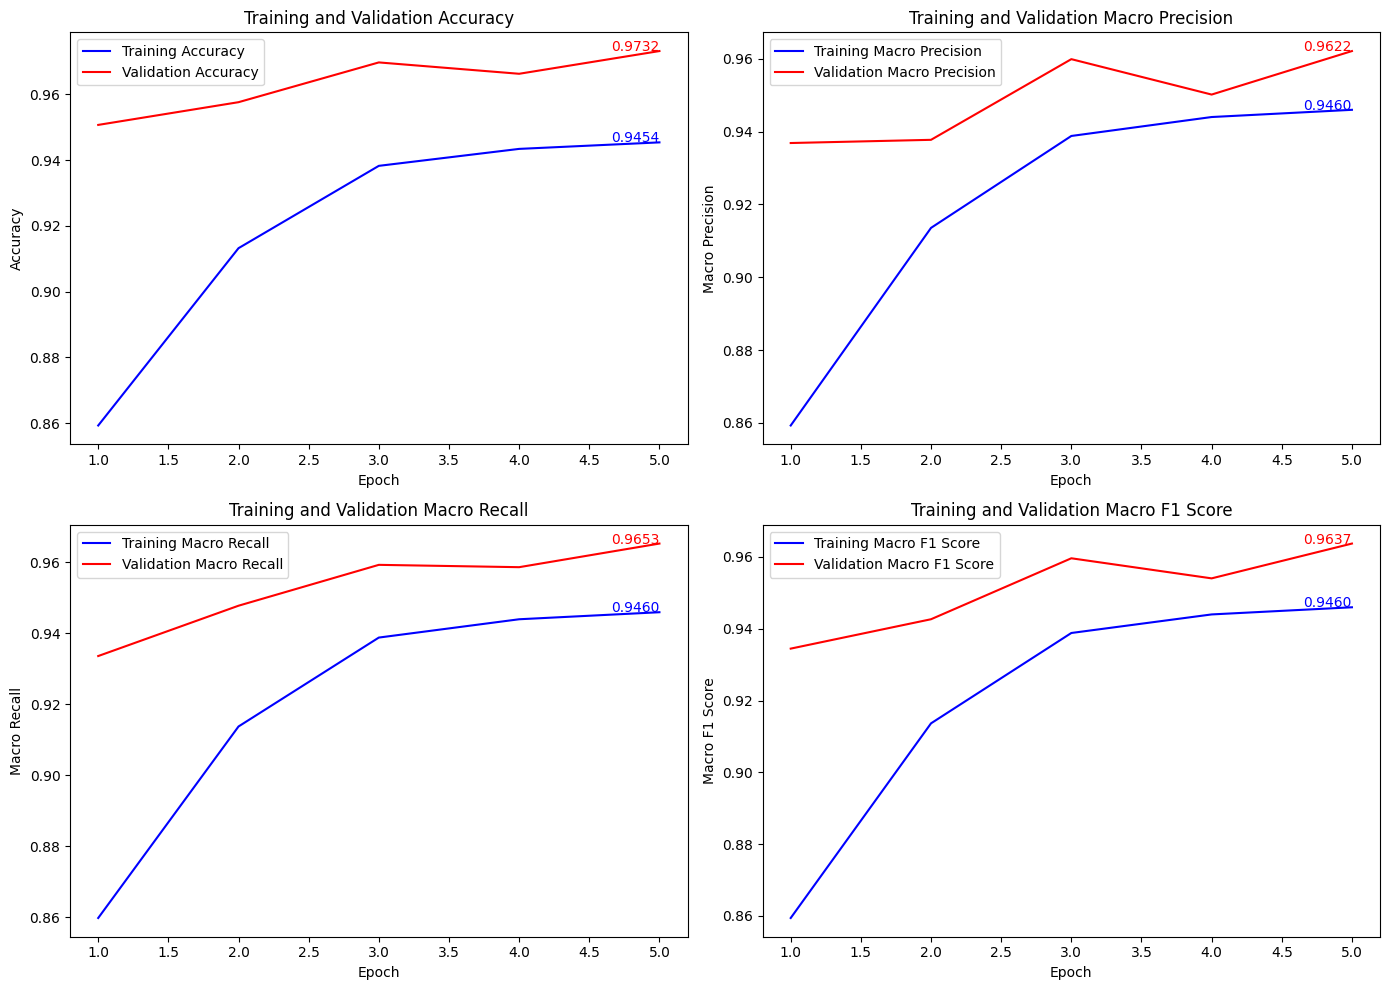

In [7]:
import matplotlib.pyplot as plt

# Split results into training and validation metrics
train_metrics, validation_metrics = results

# Extract training metrics
train_accuracy = [epoch['accuracy'] / 100 for epoch in train_metrics]
train_macro_precision = [epoch['macro_precision'] for epoch in train_metrics]
train_macro_recall = [epoch['macro_recall'] for epoch in train_metrics]
train_macro_f1 = [epoch['macro_f1'] for epoch in train_metrics]

# Extract validation metrics
validation_accuracy = [epoch['accuracy'] for epoch in validation_metrics]
validation_macro_precision = [epoch['macro avg']['precision'] for epoch in validation_metrics]
validation_macro_recall = [epoch['macro avg']['recall'] for epoch in validation_metrics]
validation_macro_f1 = [epoch['macro avg']['f1-score'] for epoch in validation_metrics]

# Create epoch list
epochs = range(1, len(train_accuracy) + 1)

# Set up the figure for 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # Wider figure
axs = axs.flatten()  # Flatten to easily index with a single number

# Plotting Accuracy
axs[0].plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
axs[0].plot(epochs, validation_accuracy, label='Validation Accuracy', color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[0].text(epochs[-1], train_accuracy[-1], f'{train_accuracy[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[0].text(epochs[-1], validation_accuracy[-1], f'{validation_accuracy[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting Precision
axs[1].plot(epochs, train_macro_precision, label='Training Macro Precision', color='blue')
axs[1].plot(epochs, validation_macro_precision, label='Validation Macro Precision', color='red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Macro Precision')
axs[1].set_title('Training and Validation Macro Precision')
axs[1].legend()
axs[1].text(epochs[-1], train_macro_precision[-1], f'{train_macro_precision[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[1].text(epochs[-1], validation_macro_precision[-1], f'{validation_macro_precision[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting Recall
axs[2].plot(epochs, train_macro_recall, label='Training Macro Recall', color='blue')
axs[2].plot(epochs, validation_macro_recall, label='Validation Macro Recall', color='red')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Macro Recall')
axs[2].set_title('Training and Validation Macro Recall')
axs[2].legend()
axs[2].text(epochs[-1], train_macro_recall[-1], f'{train_macro_recall[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[2].text(epochs[-1], validation_macro_recall[-1], f'{validation_macro_recall[-1]:.4f}', color='red', fontsize=10, ha='right')

# Plotting F1 Score
axs[3].plot(epochs, train_macro_f1, label='Training Macro F1 Score', color='blue')
axs[3].plot(epochs, validation_macro_f1, label='Validation Macro F1 Score', color='red')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Macro F1 Score')
axs[3].set_title('Training and Validation Macro F1 Score')
axs[3].legend()
axs[3].text(epochs[-1], train_macro_f1[-1], f'{train_macro_f1[-1]:.4f}', color='blue', fontsize=10, ha='right')
axs[3].text(epochs[-1], validation_macro_f1[-1], f'{validation_macro_f1[-1]:.4f}', color='red', fontsize=10, ha='right')

plt.tight_layout()
plt.show()


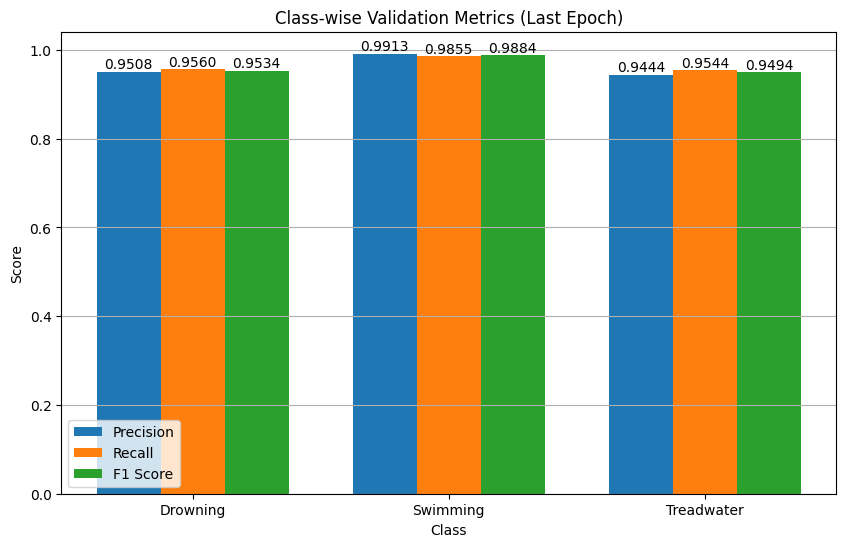

In [8]:
# Validation metrics (final epoch)
final_validation_metric = validation_metrics[-1]

# Extracting precision, recall, f1 for the three classes
classes = ['Drowning', 'Swimming', 'Treadwater']
precision = [final_validation_metric['drowning']['precision'],
             final_validation_metric['swimming']['precision'],
             final_validation_metric['treadwater']['precision']]

recall = [final_validation_metric['drowning']['recall'],
          final_validation_metric['swimming']['recall'],
          final_validation_metric['treadwater']['recall']]

f1_score = [final_validation_metric['drowning']['f1-score'],
            final_validation_metric['swimming']['f1-score'],
            final_validation_metric['treadwater']['f1-score']]

# Plotting classwise metrics (Precision, Recall, F1-Score)
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
bars_precision = ax.bar(x - width, precision, width, label='Precision')
bars_recall = ax.bar(x, recall, width, label='Recall')
bars_f1 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add values on top of each bar
for bar in bars_precision:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

for bar in bars_recall:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

for bar in bars_f1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom', ha='center')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Class-wise Validation Metrics (Last Epoch)')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
ax.grid(axis='y')

# Display the plot
plt.show()

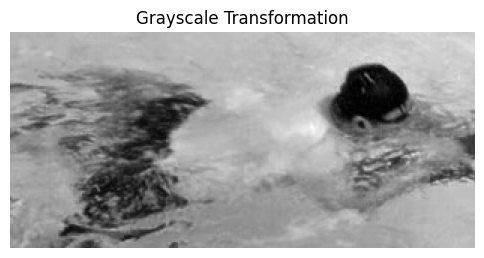

In [12]:
img_for_vis = Image.open(os.path.join(os.getenv('ROI_DATA_DIR'), 'train', 'swimming', '000000.jpg')).convert('L')

plt.figure(figsize=(6,6))
plt.imshow(img_for_vis, cmap='gray')
plt.title('Grayscale Transformation')
plt.axis('off')
plt.show()

In [13]:
model.save(
    os.path.join(os.getenv('CNN_MODEL_DIR'), 'try_convertToGrayscale.pt')
)

Model saved to C:\Users\hp\Downloads\Drowning-Detection/models/classification/CNN\try_convertToGrayscale.pt


In [14]:
# Add model prediction here
loaded_model = TorchClassifier(model='CNNClassifier', model_path=os.path.join(os.getenv('CNN_MODEL_DIR'), 'try_convertToGrayscale.pt'), device='auto', verbose=False)

img = Image.open(rf'C:\Users\hp\Downloads\Drowning-Detection\data\roi\val\drowning\{str(63).zfill(6)}.jpg')

val_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

prediction = loaded_model(
    img=img,
    transform=val_transform,
    prob=True
).cpu().numpy()

IDX_TO_CLASS2 = {
    0: 'drowning',
    1: 'swimming',
    2: 'treadwater'
}

print(prediction)
print(IDX_TO_CLASS2[np.argmax(prediction)])

loaded_model_results = loaded_model.validate(
    data_path=os.getenv('ROI_DATA_DIR'),
    transform=val_transform,
    val_test_ratio=0.5
)

[0.69854605 0.02814111 0.2733129 ]
drowning


Validation: 100%|██████████| 37/37 [00:13<00:00,  2.82it/s]

              precision    recall  f1-score   support

    drowning     0.9728    0.9835    0.9781       182
    swimming     0.9942    0.9899    0.9920       690
  treadwater     0.9650    0.9684    0.9667       285

    accuracy                         0.9836      1157
   macro avg     0.9773    0.9806    0.9790      1157
weighted avg     0.9836    0.9836    0.9836      1157

